In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import yfinance as yf

In [2]:
file_path1 = 'C:/Ashutosh/UG_22-26/WIDS_2023/apple.csv'
file_path2= 'C:/Ashutosh/UG_22-26/WIDS_2023/microsoft.csv'
file_path3 = 'C:/Ashutosh/UG_22-26/WIDS_2023/google.csv'
file_path4 = 'C:/Ashutosh/UG_22-26/WIDS_2023/amazon.csv'

# Importing the datasets

In [17]:
appledata = pd.read_csv(file_path1, parse_dates = True, index_col=0)
msftdata = pd.read_csv(file_path2, parse_dates = True, index_col=0)
googledata = pd.read_csv(file_path3, parse_dates = True, index_col=0)
amzndata= pd.read_csv(file_path4, parse_dates = True, index_col=0)

C:\Users\ashut\AppData\Local\Temp\ipykernel_14752\253984488.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  appledata = pd.read_csv(file_path1, parse_dates = True, index_col=0)
C:\Users\ashut\AppData\Local\Temp\ipykernel_14752\253984488.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  msftdata = pd.read_csv(file_path2, parse_dates = True, index_col=0)
C:\Users\ashut\AppData\Local\Temp\ipykernel_14752\253984488.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  googledata = pd.read_csv(file_path3, parse_dates = True, index_col=0)
C:\Users\ashut\AppData\Local\Temp\ipykernel_14752\253984488.py:4: UserWarning: Parsing dates in %d-%m-%Y f

In [18]:
print(appledata)

                  Open        High         Low       Close   Adj Close   
Date                                                                     
2018-12-24   37.037498   37.887501   36.647499   36.707500   35.232254  \
2018-12-26   37.075001   39.307499   36.680000   39.292500   37.713367   
2018-12-27   38.959999   39.192501   37.517502   39.037498   37.468628   
2018-12-28   39.375000   39.630001   38.637501   39.057499   37.487812   
2018-12-31   39.632500   39.840000   39.119999   39.435001   37.850140   
...                ...         ...         ...         ...         ...   
2023-12-18  196.089996  196.630005  194.389999  195.889999  195.889999   
2023-12-19  196.160004  196.949997  195.889999  196.940002  196.940002   
2023-12-20  196.899994  197.679993  194.830002  194.830002  194.830002   
2023-12-21  196.100006  197.080002  193.500000  194.679993  194.679993   
2023-12-22  195.179993  195.410004  192.970001  193.600006  193.600006   

               Volume  
Date         

In [81]:
data = [appledata, msftdata, googledata, amzndata]
companies = ['Apple', 'Microsoft', 'Google', 'Amazon']
symbols = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']

# Plots of Closing

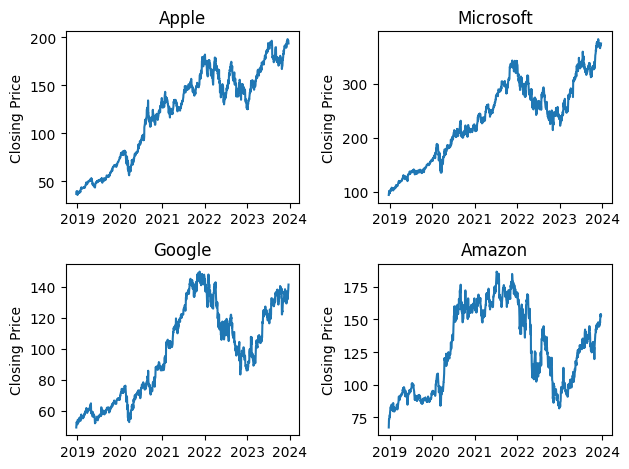

In [34]:
for i, stock_df in enumerate(data, start=1):
    plt.subplot(2, 2, i)
    plt.plot(stock_df['Close'])
    plt.ylabel('Closing Price')
    plt.title(companies[i - 1]) 

plt.tight_layout()
plt.show()

# Plots of opening

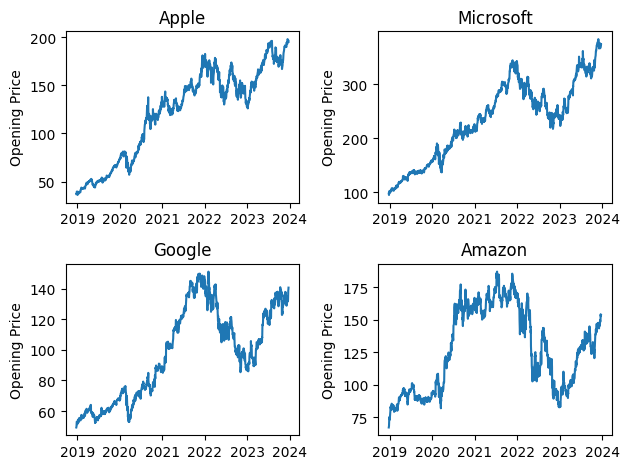

In [35]:
for i, stock_df in enumerate(data, start=1):
    plt.subplot(2, 2, i)
    plt.plot(stock_df['Open'])
    plt.ylabel('Opening Price')
    plt.title(companies[i - 1]) 

plt.tight_layout()
plt.show()

# Plots of volume traded


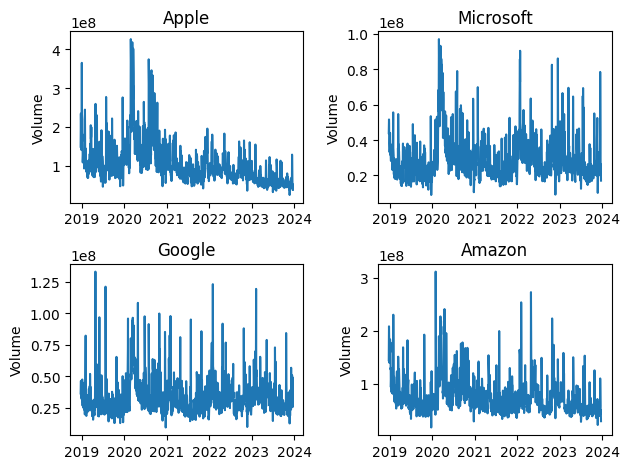

In [36]:
for i, stock_df in enumerate(data, start=1):
    plt.subplot(2, 2, i)
    plt.plot(stock_df['Volume'])
    plt.ylabel('Volume')
    plt.title(companies[i - 1]) 

plt.tight_layout()
plt.show()

# Plot of moving averages (50 days)


In [37]:
applemvg = appledata['Adj Close'].rolling(window=50).mean()
msftmvg = msftdata['Adj Close'].rolling(window=50).mean()
googlemvg = googledata['Adj Close'].rolling(window=50).mean()
amznmvg = amzndata['Adj Close'].rolling(window=50).mean()

moving_data = [applemvg, msftmvg, googlemvg, amznmvg]

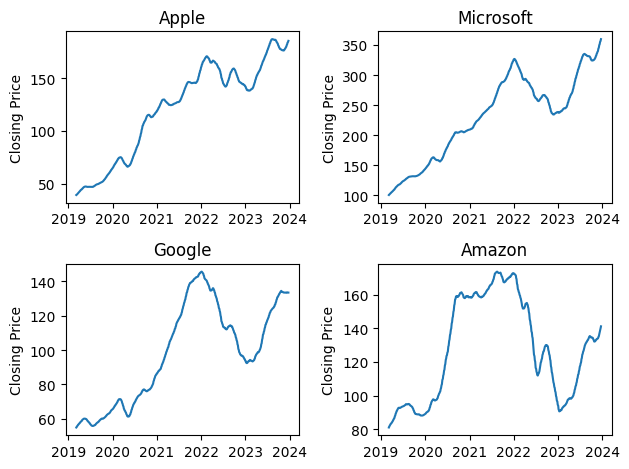

In [39]:
for i, stock_df in enumerate(moving_data, start=1):
    plt.subplot(2, 2, i)
    plt.plot(stock_df)
    plt.ylabel('Closing Price')
    plt.title(companies[i - 1]) 

plt.tight_layout()
plt.show()

# Daily returns histogram


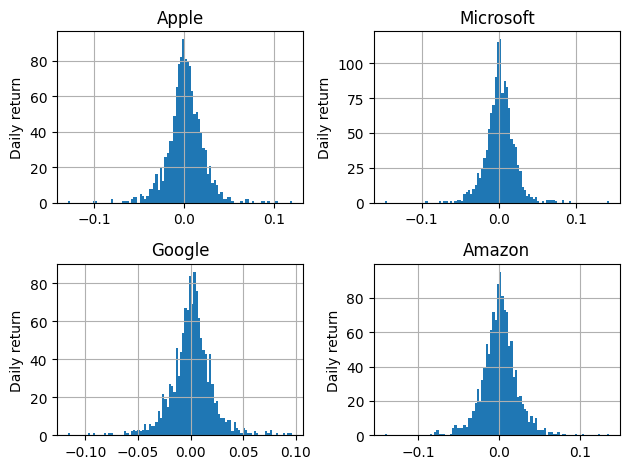

In [43]:
for stock in data:
    stock['Daily_return'] = stock['Adj Close'].pct_change()

for i, stock_df in enumerate(data, start=1):
    plt.subplot(2, 2, i)
    stock_df['Daily_return'].hist(bins = 100)
    plt.ylabel('Daily return')
    plt.title(companies[i - 1]) 

plt.tight_layout()
plt.show()

# Correlation between stock daily returns and volume

In [100]:
symbols = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']

closing_data = {}
volume_data = {}
for symbol in symbols:
    closing_data[symbol] = yf.download(symbol, start='2018-12-23', end='2023-12-23')['Adj Close']
    volume_data[symbol] = yf.download(symbol, start='2018-12-23', end='2023-12-23')['Volume']
    
closing_df = pd.DataFrame(closing_data)
volume_df = pd.DataFrame(volume_data)
returns = closing_df.pct_change()

corr_returns = returns.corr()
corr_volume = volume_df.corr()



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


# Risk return plot

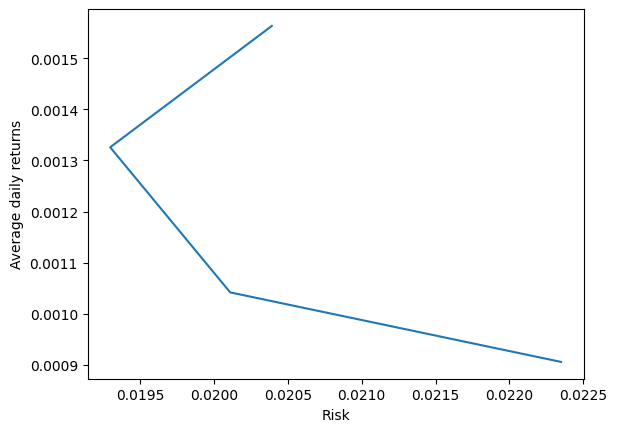

In [104]:
risk = returns.std()
avg_returns = returns.mean()
plt.plot(risk, avg_returns)
plt.xlabel('Risk')
plt.ylabel('Average daily returns')

plt.show()
